In [1]:
import numpy as np
from iotools import read_AsciiGrid
import matplotlib.pyplot as plt

eps = np.finfo(float).eps

In [2]:
file = r'/Users/jpnousu/SpaFHy_RUNS/krycklan/gis/25m_3case/stream_depth.asc'
ditch_h = read_AsciiGrid(file)[0][175:181,175:181]
ditch_h[np.isfinite(ditch_h)] = -1.0
ditch_h[ditch_h != -1.0] = 0.0
#gwl = np.full_like(ditch_h, -2.)
gwl = np.random.uniform(-1.5, -0.5, size=ditch_h.shape)
#ele = np.full_like(ditch_h, 10)  # storage of fully saturated profile
ele = np.random.uniform(100, 110, size=ditch_h.shape)
H = ele + gwl

rows = np.shape(ditch_h)[0]
cols = np.shape(ditch_h)[1]
n = rows * cols  # length of flattened array


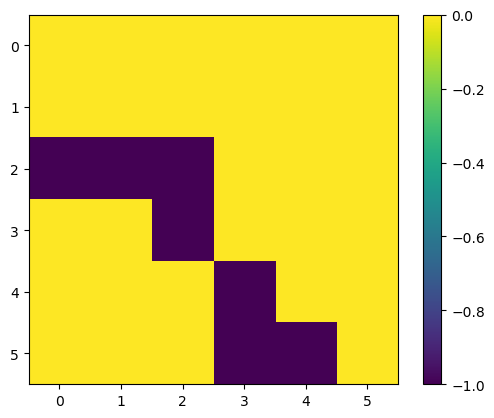

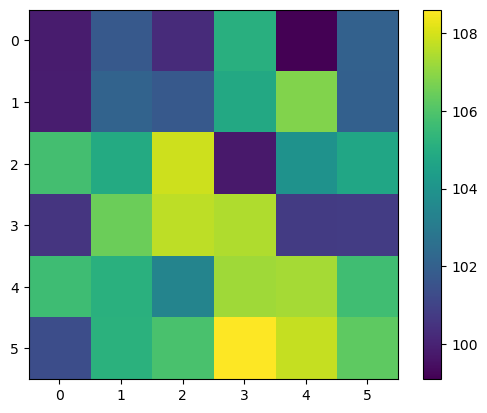

In [3]:
plt.figure(1)
plt.imshow(ditch_h); plt.colorbar()
plt.figure(2)
plt.imshow(H); plt.colorbar()


In [4]:
ditch_h = np.ravel(ditch_h)
ele = np.ravel(ele)
H = np.ravel(H)

In [6]:
# Ditches
# calculate mean H of neighboring nodes to find out whether ditch is active (constant head)
# from previous timestep to avoid switching boundary/no-boundary during iteration
H_neighbours = ditch_h.copy()
for k in np.where(ditch_h < -eps)[0]:
    print('k', k)
    H_ave = 0
    n_neigh = 0
    if k%cols != 0 and ditch_h[k-1] > -eps: # west non-ditch neighbor
            print('west neighbour!')
            H_ave += H[k-1]
            n_neigh += 1
    if (k+1)%cols != 0 and ditch_h[k+1] > -eps: # east non-ditch neighbor
            print('east neighbour!')
            H_ave += H[k+1]
            n_neigh += 1
    if k-cols >= 0 and  ditch_h[k-cols] > -eps: # north non-ditch neighbor
            print('north neighbour!')
            H_ave += H[k-cols]
            n_neigh += 1
    if k+cols < n and ditch_h[k+cols] > -eps: # south non-ditch neighbor
            print('south neighbour!')
            H_ave += H[k+cols]
            n_neigh += 1
    if n_neigh > 0:
        H_neighbours[k] = H_ave / n_neigh  # average of neighboring non-ditch nodes
        print('n_neight', n_neigh)
    else:  # corners or nodes surrounded by ditches dont have neighbors, given its ditch depth
        H_neighbours[k] = ele[k] + ditch_h[k] + eps

k 12
north neighbour!
south neighbour!
n_neight 2
k 13
north neighbour!
south neighbour!
n_neight 2
k 14
east neighbour!
north neighbour!
n_neight 2
k 20
west neighbour!
east neighbour!
south neighbour!
n_neight 3
k 27
west neighbour!
east neighbour!
north neighbour!
n_neight 3
k 33
west neighbour!
n_neight 1
k 34
east neighbour!
north neighbour!
n_neight 2


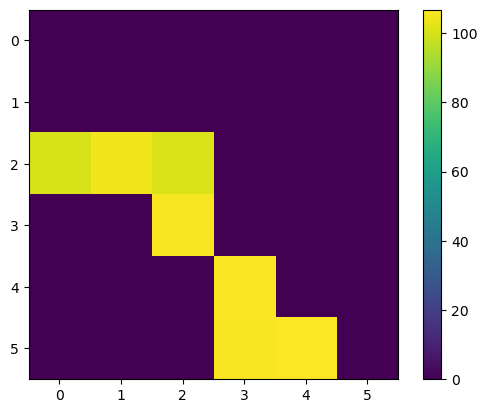

In [7]:
H_neighbours_2d = np.reshape(H_neighbours,(rows,cols))
H = np.reshape(H,(rows,cols))

plt.imshow(H_neighbours_2d); plt.colorbar()

In [17]:
(H[1,0] + H[3,0]) / 2

100.20769769677766

In [24]:
H

array([[ 99.82784998, 101.73982376, 100.25874742, 105.07571215,
         99.0884313 , 102.05106497],
       [ 99.85050221, 102.12449951, 101.74062823, 104.81424358,
        106.81463247, 101.99783469],
       [105.77199811, 104.92169499, 107.87925998,  99.746624  ,
        103.92075953, 104.73234198],
       [100.56489318, 106.45495349, 107.66156639, 107.45271633,
        100.74025941, 100.79568788],
       [105.63934167, 105.11215993, 103.36837961, 107.24088096,
        107.31425513, 105.67647586],
       [101.33315239, 105.17798919, 105.88953275, 108.60383948,
        107.75894161, 106.25627077]])

In [20]:
H_neighbours_2d

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [100.2076977 , 104.2897265 , 100.74362611,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 105.75868314,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , 106.04511702,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , 105.88953275,
        106.78526295,   0.        ]])

array([[    0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ],
       [10599.16841147, 10942.25487421, 10868.14783236,     0.        ,
            0.        ,     0.        ],
       [    0.        ,     0.        , 11386.14548662,     0.        ,
            0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , 11372.37177121,
            0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , 11500.00981778,
        11507.06691466,     0.        ]])